In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
#Read the data from csv file
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Understand the data 
Cars milege:
HP:Horse power of engine(x1 column),MPG:Milege(miles pergallon)(y column),Vol:Volume(x2 column),WT:Weight(x3 column),SP:TOP speed of the car(x4 column)

In [4]:
#Rearrange the columns
cars=pd.DataFrame(cars,columns=['HP','VOL','SP','WT','MPG'])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Assumption in Multilinear Regression
##### 1.Linearity:The relationship btw the predictors(X) and the response(Y) is linear.
##### 2.Independence:Observations are independent of each other.
##### 3.Homoscedasticity:The residuals(Y-Y_hat)exhibit constant variance at all levels of the predictor.
##### 4.Normal Distirbution of Errors:The residuals of the model are normally distributed.
##### 5.No Multicollinearity:The independent variables should not be too highly correlated with each other.
#### Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

#### EDA

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
#Check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations
- There are no missing values
- There are 81 observations(81 different cars data)
- The data types of the columns are also relevant and valid

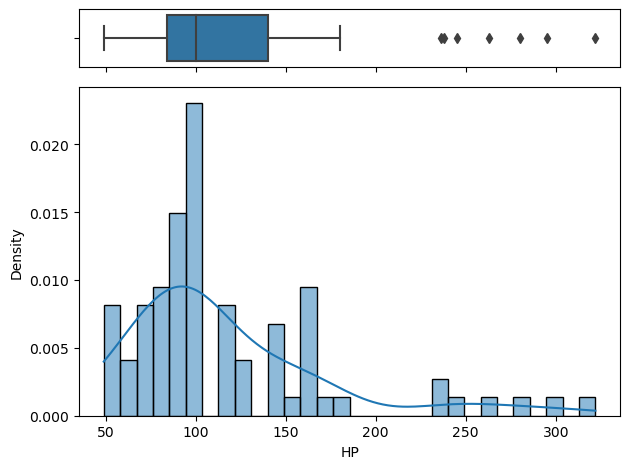

In [10]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#Creating a boxplot
sns.boxplot(data=cars,x="HP",ax=ax_box,orient='h')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="HP" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

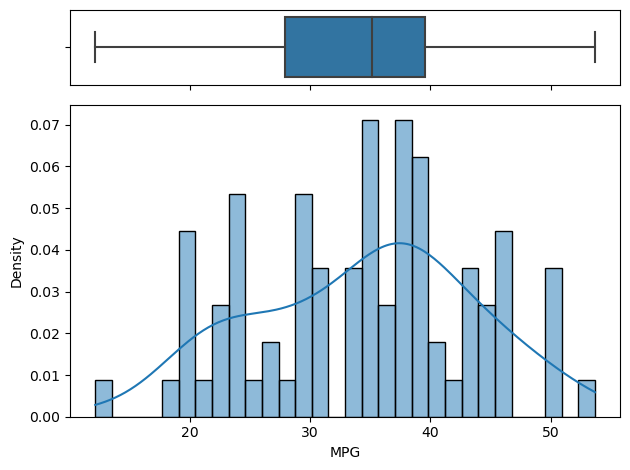

In [11]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.18,.75)})
#Creating a boxplot
sns.boxplot(data=cars,x="MPG",ax=ax_box,orient='m')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="MPG" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

C:\Users\chala\anaconda\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


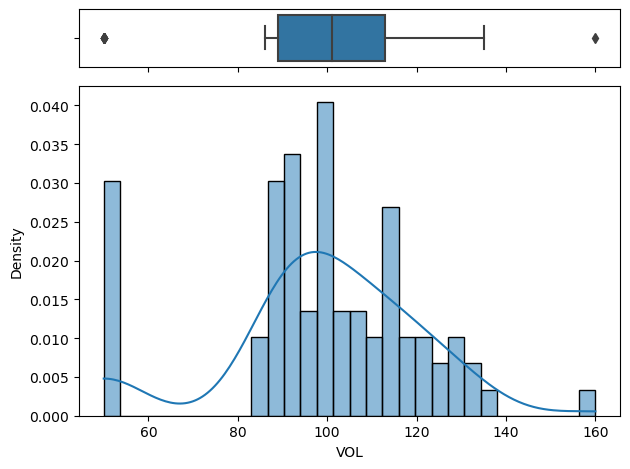

In [12]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.14,.80)})
#Creating a boxplot
sns.boxplot(data=cars,x="VOL",ax=ax_box,orient='v')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="VOL" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

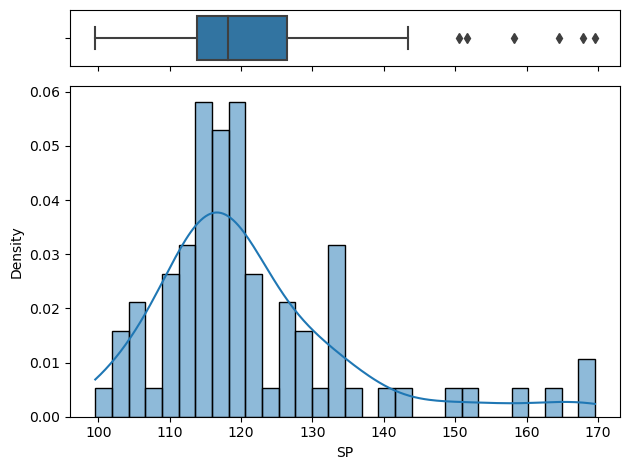

In [13]:
#Create a figure with two subplots(one above the other)
fig, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.16,.95)})
#Creating a boxplot
sns.boxplot(data=cars,x="SP",ax=ax_box,orient='s')
ax_box.set(xlabel='')#Remove x label for the boxplot

#Creating a histogram in the same x-axis
sns.histplot(data=cars, x="SP" , ax=ax_hist , bins=30 , kde=True, stat="density")
ax_hist.set(ylabel="Density")

#Adjust Layout
plt.tight_layout()
plt.show()

### Observations from boxplot and histograms
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns,a few outliers are observed in both tails for the distributions.
- the extreme values of cars data may have come from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model.

##### Checking for duplicated rows


In [16]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


##### Pair plots and Correlation Coefficients


C:\Users\chala\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


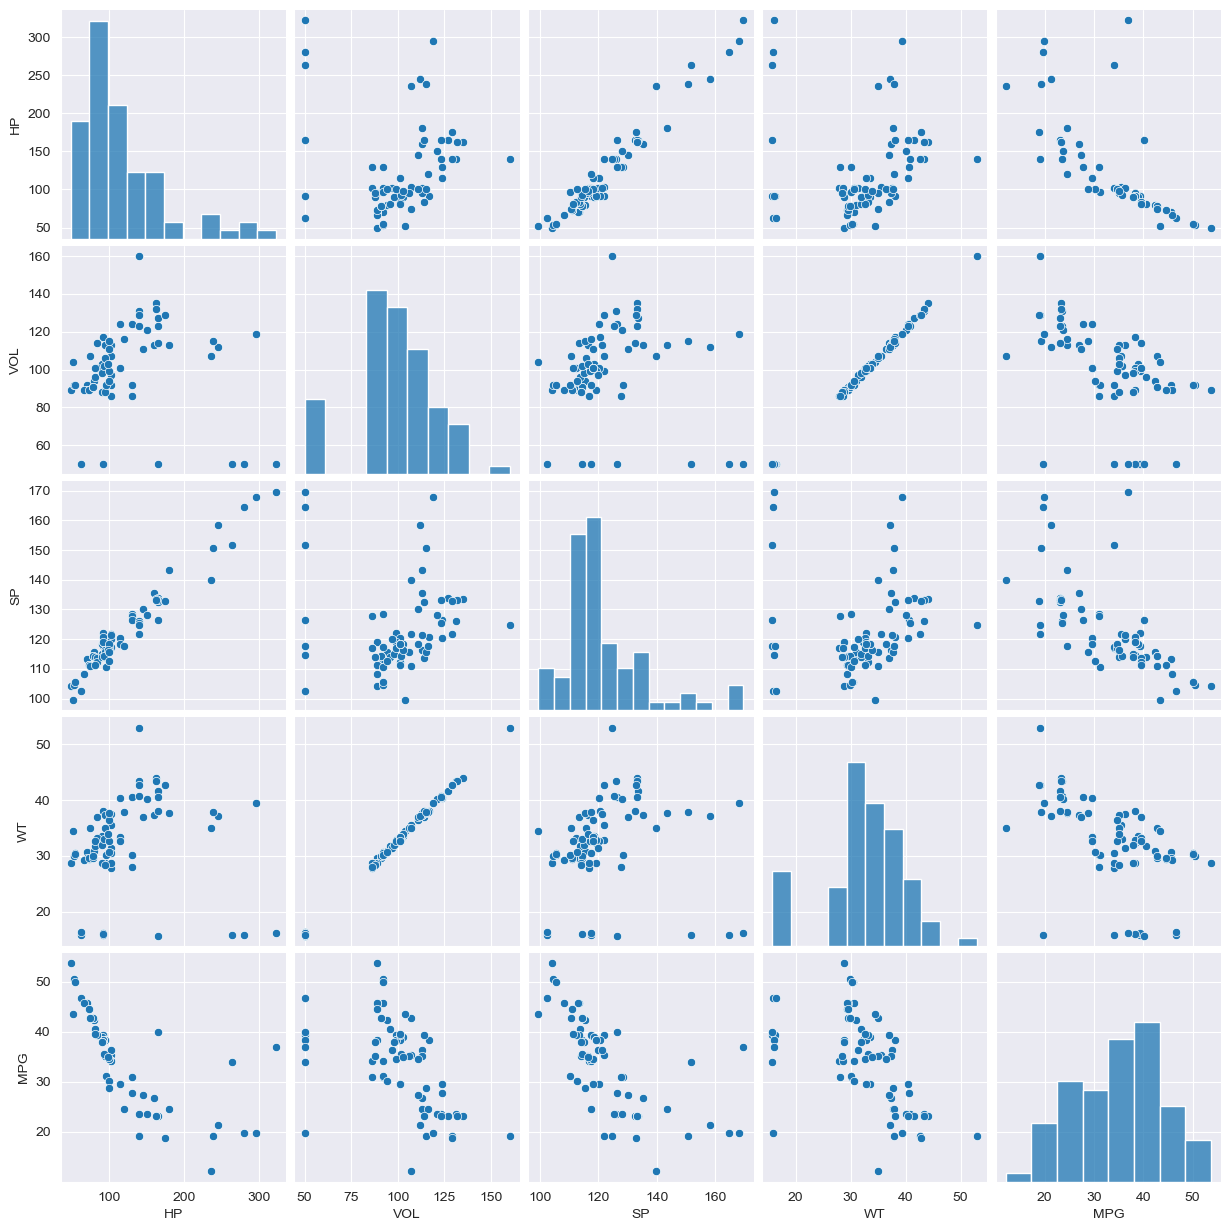

In [18]:
#Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [19]:
#Checking for correlation
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


##### Observations
- There are only tails are displayed in the duplicated rows
  

#### 6|02|25

#### Assumptions
- xi vs y:Linear Relation 
- xi vs xi:Perfectly no correlation
- Homorcedaticity constant variance among residuals
- No multicorrelation

In [23]:
cars

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232
...,...,...,...,...,...
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733


In [24]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:03:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations and model summary
- The R-squared and adjusted R-squared values as a good and about 75% visibility in Y is replaced by X column
- The probability value with respect to f-values is data to rows icluding all the  X columns
- the p-value for VOL and WT are higher than 51% 

In [26]:
#Find the performance metrices
#Create a dataframe with actual y and predicted y values

df1 = pd.DataFrame()
df1['actual_y1'] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [27]:
pred_y1=model1.predict(cars.iloc[:,0:4])
df1["pred_y1"]=pred_y1
df1.head()                                                                              

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


#### 7|02|2025

In [29]:
#Compute the Mean Squared Error(MSE),RMSE for model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df1["actual_y1"],df1["pred_y1"])
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))

MSE: 18.897141152343096
RMSE: 4.347084212704315


#### Checking for multicollinearity among x-columns using VIF method


In [31]:
#Compute VIF values
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols('SP~VOL+HP+WT',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

#Starting vif values in a dataframe
d1={'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [32]:
cars1=cars.drop("WT",axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


### Observations
- The ideal range of Vif values shall be btw 0 to 10.However slightly higher values values can be tolerated.
- As seen from the way high Vif values for VOL and WT is clear.
- It is decided to drop WT and obtain VOL column it further models

In [34]:
model2=smf.ols('MPG~HP+VOL+SP',data=cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:03:17   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 #### Performance metrics for model2

In [36]:
#Find the performance metrics
#Create a data frame with actual y and predicted y columns

df2=pd.DataFrame()
df2["actual_y2"]=cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [37]:
pred_y2=model1.predict(cars.iloc[:,0:4])
df2["pred_y2"]=pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [38]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df2["actual_y2"],df2["pred_y2"])
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))

MSE: 18.897141152343096
RMSE: 4.347084212704315


### Observations
- The R squared value improved slightly to 0.75,
- All the p-values for model parameters are less than 5% hence they are significant.
- There is no improvement in MSE value.

##### 8|02|25

#### Identfication of high influence points 

In [46]:
cars1.shape

(81, 4)

In [52]:
#Define variables and assign values
k=3
n=51
leverage_cutoff=3*((k+3)/n)
leverage_cutoff

0.3529411764705882

In [62]:
from statsmodels.graphics.regressionplots import infulence_plot

influence_plot(model1,alpha=0.5)
y=[i for i in range(-2,0)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

ImportError: cannot import name 'infulence_plot' from 'statsmodels.graphics.regressionplots' (C:\Users\chala\anaconda\Lib\site-packages\statsmodels\graphics\regressionplots.py)

#### Observations
- From the above plot it is evident that data points 65,70,76,78,79,80 are the influencers
- As their H leverage values at highest and size is higher

In [68]:
cars1[cars1.index.isin((65,70,76,78,79,80))]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [72]:
cars2=cars1.drop(cars.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)

In [74]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


#### Build Model3 on cars2 dataset

In [83]:
#Rebuild the model
model3=smf.ols('MPG~VOL+SP+HP',data=cars2).fit()

In [85]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        12:22:57   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
df3=pd.DataFrame()
df3["actual_y3"]=cars["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [93]:
pred_y3=model3.predict(cars.iloc[:,0:3])
df3["pred_y3"]=pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [95]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df3["actual_y3"],df3["pred_y3"])
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))

MSE: 42.59180277075994
RMSE: 6.526239558180495
